In [190]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nyse/prices-split-adjusted.csv
/kaggle/input/nyse/prices.csv
/kaggle/input/nyse/securities.csv
/kaggle/input/nyse/fundamentals.csv


In [191]:
import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
%matplotlib inline

In [192]:
df_prices = pd.read_csv("../input/nyse/prices.csv")
df_pricesplit = pd.read_csv("../input/nyse/prices-split-adjusted.csv")
df_securities = pd.read_csv("../input/nyse/securities.csv")
df_fundamentals = pd.read_csv("../input/nyse/fundamentals.csv")


In [193]:
df_prices.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


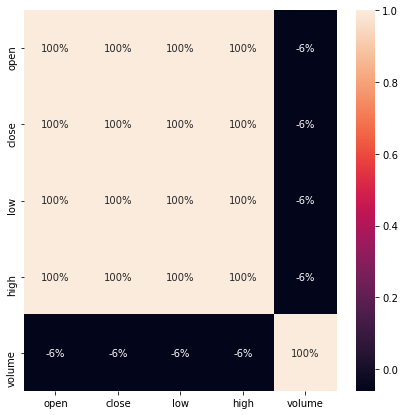

In [194]:
plt.figure(figsize= (7,7))
sns.heatmap(df_prices.corr(), annot=True, fmt='.0%' )

In [195]:
df_pricesplit.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


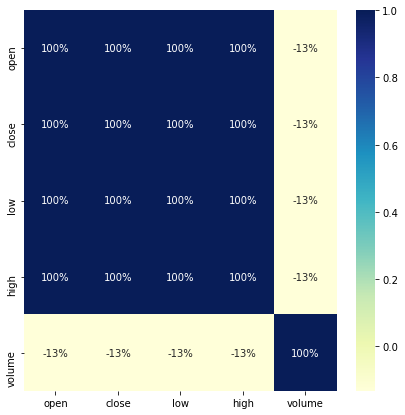

In [196]:
plt.figure(figsize= (7,7))
sns.heatmap(df_pricesplit.corr(), annot=True, fmt='.0%',cmap="YlGnBu" )

In [197]:
df_securities.head()

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877


In [198]:
df_securities.corr()

,CIK
CIK,1.0


In [199]:
df_fundamentals.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [200]:
df_fundamentals.corr()

,Unnamed: 0,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
Unnamed: 0,1.000000,-0.040855,0.030659,0.057706,-0.005466,-0.011580,-0.033895,0.000620,-0.018198,-0.050073,...,-0.054959,-0.029891,-0.041645,-0.035783,-0.037265,0.024759,-0.049339,0.001792,-0.018553,-0.008534
Accounts Payable,-0.040855,1.000000,0.081415,0.147322,-0.017927,-0.269963,0.449126,-0.124794,0.802614,-0.128691,...,0.319752,0.396114,0.790635,0.817216,0.830663,0.542084,-0.233946,-0.005447,0.068627,0.606004
Accounts Receivable,0.030659,0.081415,1.000000,-0.038108,0.007046,0.044149,0.124554,-0.029177,0.123242,0.116394,...,-0.164371,-0.146215,0.134037,0.153563,0.154243,-0.069428,-0.089796,0.014791,-0.045241,-0.036844
Add'l income/expense items,0.057706,0.147322,-0.038108,1.000000,-0.009108,-0.380987,0.015813,0.018731,0.030082,-0.077841,...,0.225926,0.260731,0.241735,0.037034,0.063811,0.283123,-0.329980,0.003673,0.095882,0.149354
After Tax ROE,-0.005466,-0.017927,0.007046,-0.009108,1.000000,0.020522,-0.033658,0.015120,-0.019268,0.025754,...,-0.012886,-0.010520,-0.055657,-0.025985,-0.030291,-0.023004,0.001137,0.002477,-0.041679,-0.027492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Total Revenue,0.024759,0.542084,-0.069428,0.283123,-0.023004,-0.630064,0.243656,-0.118801,0.173184,-0.273296,...,0.631288,0.768593,0.555397,0.264017,0.306483,1.000000,-0.467346,0.009180,0.135986,0.473148
Treasury Stock,-0.049339,-0.233946,-0.089796,-0.329980,0.001137,0.477294,-0.162374,0.062980,-0.041202,0.143678,...,-0.331342,-0.438701,-0.353853,-0.099344,-0.133734,-0.467346,1.000000,-0.007441,-0.120116,-0.301653
For Year,0.001792,-0.005447,0.014791,0.003673,0.002477,-0.008012,0.006526,0.018120,0.001561,-0.005977,...,0.001852,-0.004247,0.008098,0.002354,0.003132,0.009180,-0.007441,1.000000,0.012001,0.004065
Earnings Per Share,-0.018553,0.068627,-0.045241,0.095882,-0.041679,-0.018248,-0.039643,0.025549,0.012751,-0.069713,...,0.092398,0.102088,0.075287,0.018544,0.026112,0.135986,-0.120116,0.012001,1.000000,-0.050840


In [201]:
df_pricesplit.isna().any()

date      False
symbol    False
open      False
close     False
low       False
high      False
volume    False
dtype: bool

In [202]:
df_pricesplit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [203]:
import datetime
df=df_pricesplit.sort_values(by='date')

In [204]:
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-06-01') 
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.857235
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.130558
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.698215
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.238651
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.155792
...,...,...,...,...,...,...
2020-06-09,345.609985,332.010010,332.140015,343.989990,36928100.0,343.989990
2020-06-10,354.769989,346.089996,347.899994,352.839996,41662900.0,352.839996
2020-06-11,351.059998,335.480011,349.309998,335.899994,50415600.0,335.899994


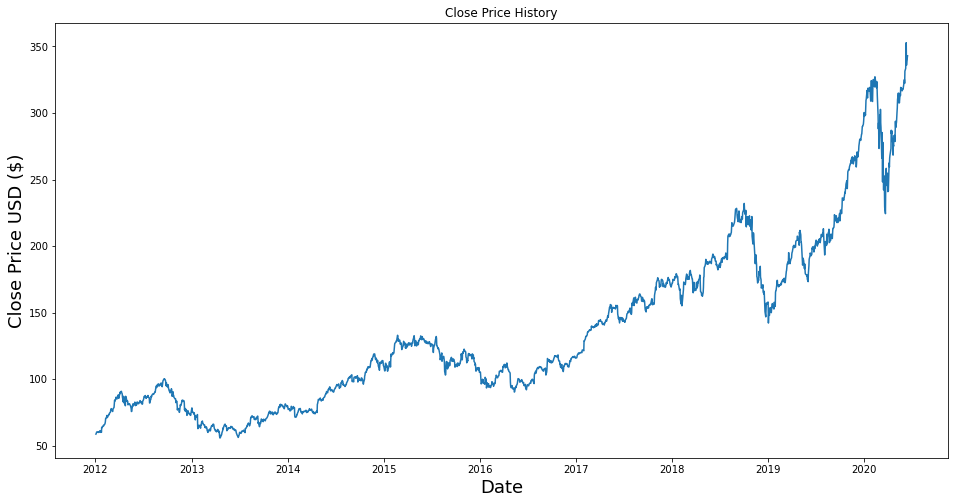

In [205]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [206]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil( len(dataset) *.8) 

In [207]:
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [208]:
train_data = scaled_data[0:training_data_len  , : ]
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [209]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [210]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [211]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [212]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [213]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1641/1641 [==============================] - 74s 45ms/step - loss: 5.2805e-04


In [214]:
test_data = scaled_data[training_data_len - 60: , : ]
x_test = []
y_test =  dataset[training_data_len : , : ] 
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [215]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)

In [216]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

11.234888322857238

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


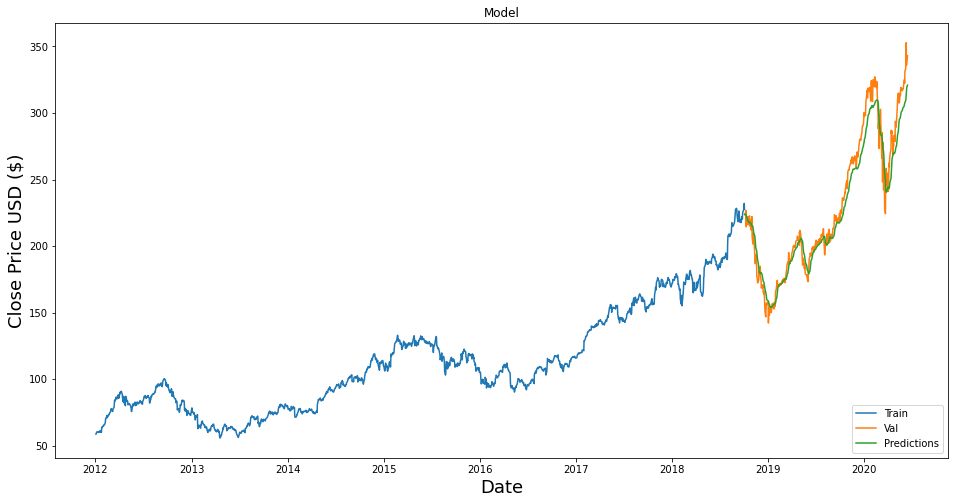

In [217]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [218]:
valid

,Close,Predictions
Date,,
2018-10-05,224.289993,223.622498
2018-10-08,223.770004,223.950241
2018-10-09,226.869995,223.865662
2018-10-10,216.360001,223.855408
2018-10-11,214.449997,222.909531
...,...,...
2020-06-09,343.989990,310.967743
2020-06-10,352.839996,313.588287
2020-06-11,335.899994,317.176300


In [219]:
apple = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-06-01')
new_df = apple.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[322.347]]


In [220]:
apple1 = web.DataReader('AAPL', data_source='yahoo', start='2020-06-02', end='2020-06-02')
print(apple1['Close'])

KeyError: 'Date'